In [101]:
library(DT)
library(ggplot2)
library(lubridate)
library(plyr)
library(dplyr)
library(scales)

In [85]:
temp = list.files(pattern="*_1.csv")
allData2 <- lapply(temp, read.csv)
allData3 <- do.call(rbind, allData2)

In [63]:
temp2 = list.files(pattern="*Company_names.csv")
allDataLL <- lapply(temp2, read.csv)
allDataLL3 <- do.call(rbind, allDataLL)

In [64]:
nrow(allDataLL3)

[1] 55

In [65]:
nrow(allData3)

[1] 11398006

In [66]:
colnames(allData3)

[1] "Trip.Start.Timestamp"    "Trip.Seconds"           
[3] "Trip.Miles"              "Pickup.Community.Area"  
[5] "Drop.off.community.Area" "id"

In [87]:
lubridateDate <- mdy_hms(allData3$'Trip.Start.Timestamp')

allData3$lubridateDate <- lubridateDate
allData3$month <- month(lubridateDate)
allData3$day <- day(lubridateDate)
allData3$year <- year(lubridateDate)
allData3$hour <- hour(lubridateDate)
allData3$minute <- minute(lubridateDate)
allData3$second <- second(lubridateDate)
allData3$weekday <- weekdays(allData3$lubridateDate)



Warning message:
"All formats failed to parse. No formats found."

In [91]:
allData3$lubridateDateOnly <- as.Date(mdy_hms(allData3$'Trip.Start.Timestamp'))

In [84]:
#lubridateDateOnly <- date(allData3$'Trip.Start.Timestamp')


ERROR: Error in as.POSIXlt.character(as.character(x), ...): character string is not in a standard unambiguous format


In [88]:
colnames(allData3)

[1] "Trip.Start.Timestamp"    "Trip.Seconds"           
 [3] "Trip.Miles"              "Pickup.Community.Area"  
 [5] "Drop.off.community.Area" "id"                     
 [7] "lubridateDate"           "lubridateDateOnly"      
 [9] "month"                   "day"                    
[11] "year"                    "hour"                   
[13] "minute"                  "second"                 
[15] "weekday"

In [92]:
head(allData3)

Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Drop.off.community.Area,id,lubridateDate,lubridateDateOnly,month,day,year,hour,minute,second,weekday
01/01/2019 12:00:00 AM,1260,0.6,77,28,26,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday
01/01/2019 12:00:00 AM,360,0.8,8,8,50,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday
01/01/2019 12:00:00 AM,360,1.0,8,8,50,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday
01/01/2019 12:00:00 AM,420,0.8,8,8,51,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday
01/01/2019 12:00:00 AM,180,0.7,77,4,50,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday
01/01/2019 12:00:00 AM,960,0.6,28,32,50,2019-01-01,2019-01-01,1,1,2019,0,0,0,Tuesday


In [93]:
tail(allData3)

,Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Drop.off.community.Area,id,lubridateDate,lubridateDateOnly,month,day,year,hour,minute,second,weekday
11398001,12/31/2019 11:45:00 PM,2241,2.21,32,8,36,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday
11398002,12/31/2019 11:45:00 PM,1639,4.10,7,32,48,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday
11398003,12/31/2019 11:45:00 PM,2040,18.30,76,8,13,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday
11398004,12/31/2019 11:45:00 PM,4271,17.81,56,8,29,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday
11398005,12/31/2019 11:45:00 PM,600,1.30,32,8,47,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday
11398006,12/31/2019 11:45:00 PM,1303,2.90,8,32,29,2019-12-31 23:45:00,2019-12-31,12,31,2019,23,45,0,Tuesday


In [95]:
daycount <- allData3 %>% group_by(lubridateDateOnly) %>%summarise(count = n())

In [96]:
daycount

lubridateDateOnly,count
2019-01-01,19110
2019-01-02,24055
2019-01-03,28028
2019-01-04,29721
2019-01-05,19212
2019-01-06,18148
2019-01-07,28792
2019-01-08,30730
2019-01-09,35747
2019-01-10,38262


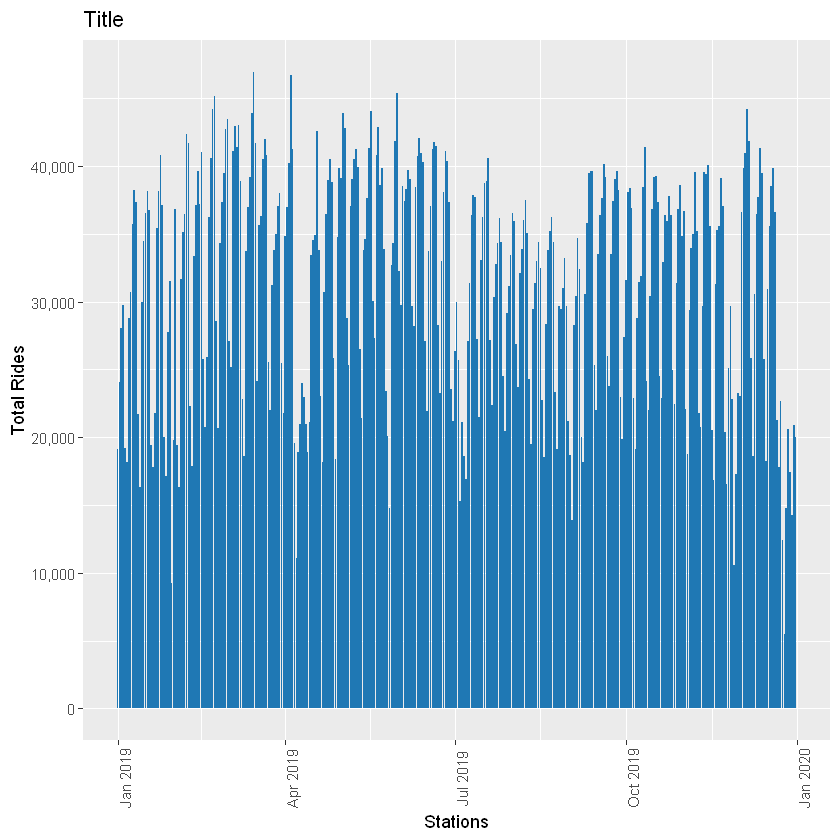

In [102]:
ggplot(daycount, aes(x=lubridateDateOnly, y=count))+geom_bar(stat="identity", fill="#1f78b4")+labs(y = "Total Rides", x="Date", title="Per date count")+scale_y_continuous(labels=comma)+theme(axis.text.x = element_text(angle = 90))